In [57]:
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np

In [8]:
lcs = lk.search_lightcurve('V1298 Tau')
# lcs = lk.search_lightcurve('HD 114082')
lcs

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,K2 Campaign 04,2015,K2,1800,ktwo210818897,0.0
1,K2 Campaign 04,2015,EVEREST,1800,ktwo210818897,0.0
2,K2 Campaign 04,2015,K2SC,1800,ktwo210818897,0.0
3,K2 Campaign 04,2015,K2SFF,1800,ktwo210818897,0.0
4,K2 Campaign 04,2015,K2VARCAT,1800,ktwo210818897,0.0
5,TESS Sector 43,2021,SPOC,20,15756231,0.0
6,TESS Sector 44,2021,SPOC,20,15756231,0.0
7,TESS Sector 43,2021,SPOC,120,15756231,0.0
8,TESS Sector 44,2021,SPOC,120,15756231,0.0


In [38]:
lcsc = lcs[[7,8]]

lc = lcsc.download_all()



/home/ilin/anaconda3/lib/python3.11/site-packages/astropy/utils/decorators.py:603: LightkurveDeprecationWarning: "t0" was deprecated in version 2.0 and will be removed in a future version. Use argument "epoch_time" instead.
  return function(*args, **kwargs)
/home/ilin/anaconda3/lib/python3.11/site-packages/lightkurve/lightcurve.py:1041: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

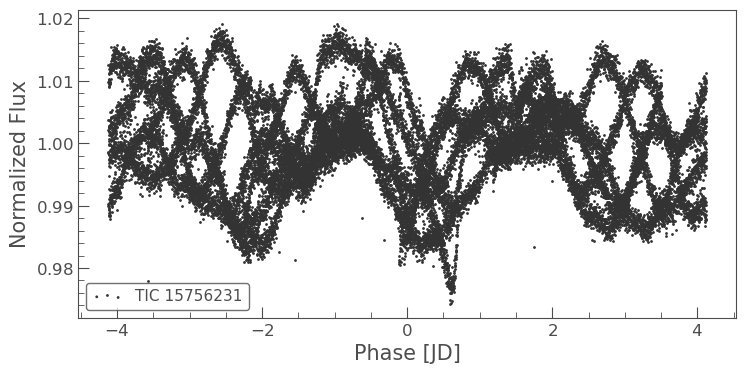

In [39]:

t0 =2459481.16636
period =  8.2438

lc = lc.stitch().remove_outliers(sigma=8)

foldedlc = lc.fold(period=period, t0=t0)

foldedlc.scatter()


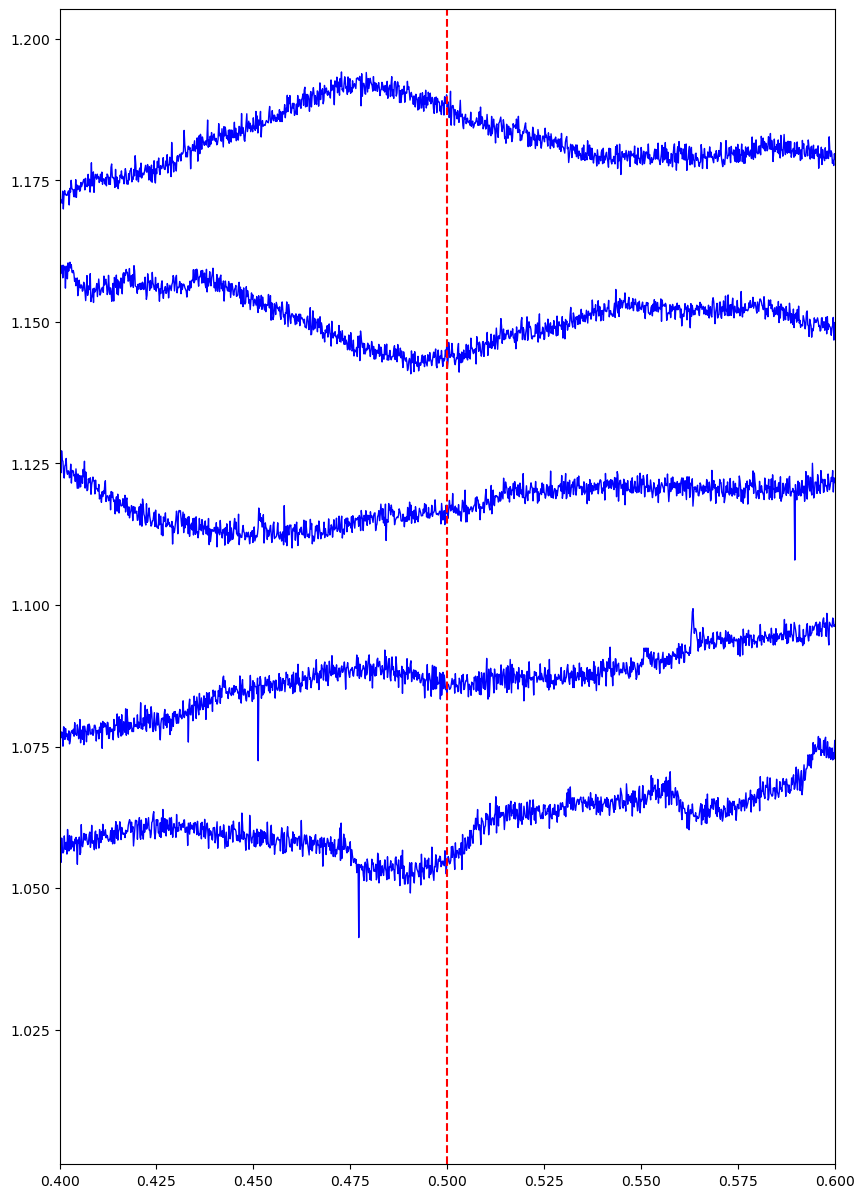

In [56]:
# plot data point after data point until you surpass 1 period, then add an offset of .3
%matplotlib inline

phase = (((lc.time.value + 2457000 - t0) % period) / period + 0.5) % 1
flux = lc.flux

fig, ax = plt.subplots(figsize=(10, 15))
offset = 0
io = 0
poffset = 0
for i in range(len(phase)):
    if phase[i] < phase[i-1] :
        
        plt.plot(phase[io:i] , flux[io:i] + offset, 'b', linewidth=1)
        io = i
        offset += .03
        poffset +=1

plt.xlim(0.4,0.6)
plt.axvline(0.5, color='r', linestyle='--') 

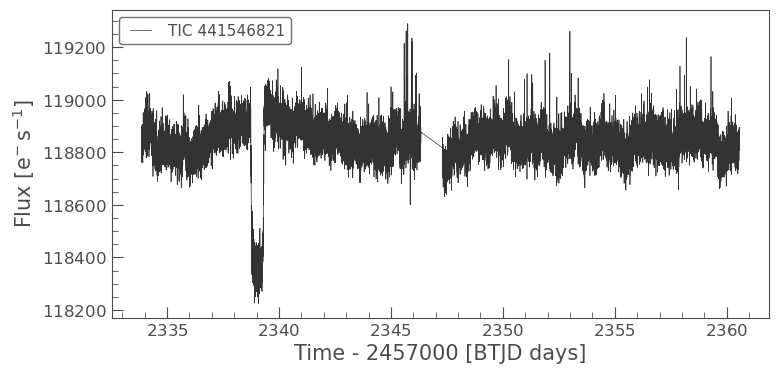

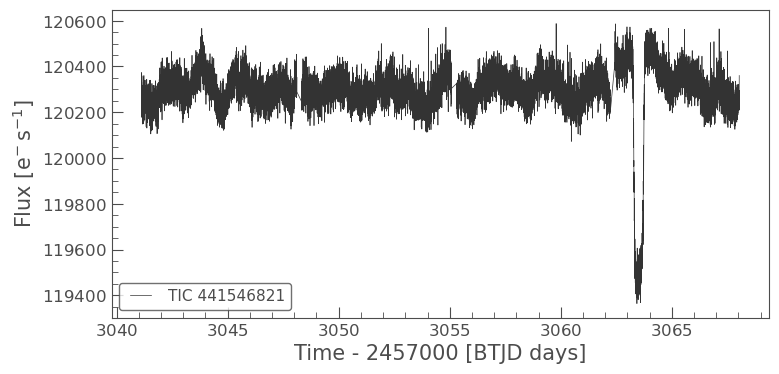

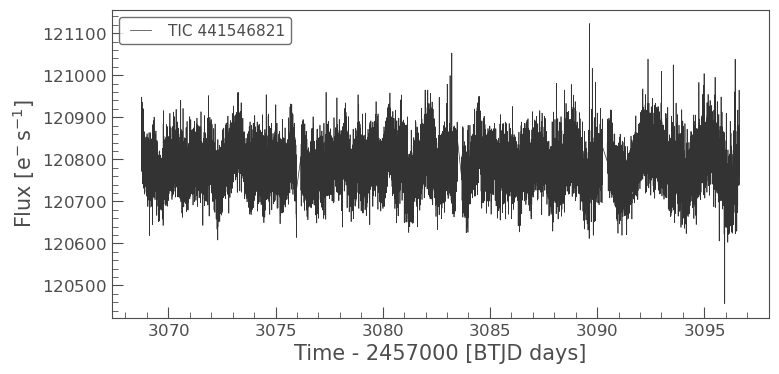

In [ ]:
%matplotlib inline
for l in lc:
    l.plot()
    # plt.xlim(2360,2365)

(0.0, 1.1)

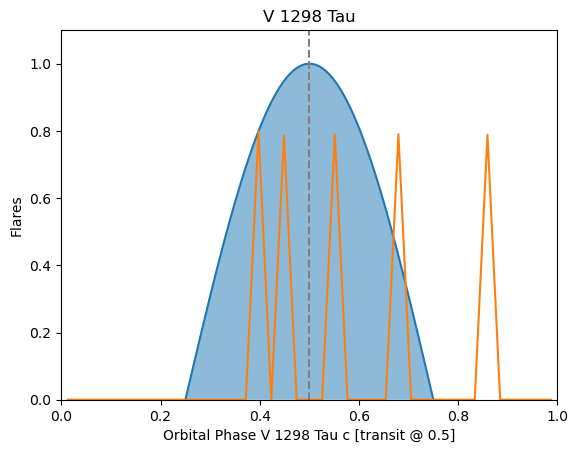

In [81]:
flares = (np.array([0.89,0.95,0.06,0.18,0.35]) +0.5) % 1

bins = np.linspace(0, 1, 40)

obsphases, bins = np.histogram(phase, bins=bins)

flarephases, bins = np.histogram(flares, bins=bins)

binmids = (bins[1:] + bins[:-1]) / 2

obstimes = obsphases * 2. / 60 / 24

x = np.linspace(0, 0.5, 1000)
plt.plot(x +.25, np.sin(2 * np.pi * x))

plt.fill_between(x +.25, np.sin(2 * np.pi * x), alpha=0.5)

plt.plot(binmids, flarephases/obstimes)
plt.axvline(0.5, color='grey', linestyle='--')
plt.title('V 1298 Tau')
plt.xlabel('Orbital Phase V 1298 Tau c [transit @ 0.5]')
plt.ylabel('Flares')
plt.xlim(0,1)
plt.ylim(0,1.1)